In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install tensorflow_datasets

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
(train, test) = tfds.load('mnist',
                                split = ['train','test'])

In [ ]:
train

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
test

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)

    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)

    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test


In [ ]:
X_train, X_test, y_train, y_test = load_dataset(60000,10000)

X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2714736906737605
Max: 244.94693302864556


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Optimizing at the Initialization Stage

In [ ]:
from tensorflow.keras import layers

In [ ]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [ ]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_zeros = simple_model(init, activate)
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

In [ ]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 3s 57ms/step - loss: 2.3017 - accuracy: 0.0984 - val_loss: 2.3013 - val_accuracy: 0.1157
Epoch 2/10
19/19 [==============================] - 1s 34ms/step - loss: 2.3012 - accuracy: 0.1260 - val_loss: 2.3009 - val_accuracy: 0.1641
Epoch 3/10
19/19 [==============================] - 1s 39ms/step - loss: 2.3009 - accuracy: 0.1778 - val_loss: 2.3005 - val_accuracy: 0.1997
Epoch 4/10
19/19 [==============================] - 1s 36ms/step - loss: 2.3005 - accuracy: 0.1882 - val_loss: 2.3001 - val_accuracy: 0.1877
Epoch 5/10
19/19 [==============================] - 1s 32ms/step - loss: 2.3001 - accuracy: 0.1757 - val_loss: 2.2998 - val_accuracy: 0.1745
Epoch 6/10
19/19 [==============================] - 1s 32ms/step - loss: 2.2997 - accuracy: 0.1626 - val_loss: 2.2993 - val_accuracy: 0.1614
Epoch 7/10
19/19 [==============================] - 1s 32ms/step - loss: 2.2993 - accuracy: 0.1524 - val_loss: 2.2989 - val_accuracy: 0.1533
Epoch 8/10
19

In [ ]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_glorotu = simple_model(init, activate)
model_glorotu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_glorotu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 3s 84ms/step - loss: 2.2993 - accuracy: 0.1102 - val_loss: 2.2686 - val_accuracy: 0.1283
Epoch 2/10
19/19 [==============================] - 1s 59ms/step - loss: 2.2455 - accuracy: 0.1497 - val_loss: 2.2195 - val_accuracy: 0.1841
Epoch 3/10
19/19 [==============================] - 1s 57ms/step - loss: 2.1971 - accuracy: 0.2094 - val_loss: 2.1713 - val_accuracy: 0.2460
Epoch 4/10
19/19 [==============================] - 1s 40ms/step - loss: 2.1475 - accuracy: 0.2623 - val_loss: 2.1190 - val_accuracy: 0.2917
Epoch 5/10
19/19 [==============================] - 1s 37ms/step - loss: 2.0930 - accuracy: 0.3015 - val_loss: 2.0599 - val_accuracy: 0.3229
Epoch 6/10
19/19 [==============================] - 1s 35ms/step - loss: 2.0312 - accuracy: 0.3318 - val_loss: 1.9924 - val_accuracy: 0.3529
Epoch 7/10
19/19 [==============================] - 1s 34ms/step - loss: 1.9613 - accuracy: 0.3582 - val_loss: 1.9159 - val_accuracy: 0.3771
Epoch 8/10
19

In [ ]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_heu = simple_model(init, activate)
model_heu.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_heu.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 3s 73ms/step - loss: 2.4598 - accuracy: 0.1911 - val_loss: 2.1214 - val_accuracy: 0.2775
Epoch 2/10
19/19 [==============================] - 1s 32ms/step - loss: 1.9679 - accuracy: 0.3373 - val_loss: 1.8477 - val_accuracy: 0.3976
Epoch 3/10
19/19 [==============================] - 1s 29ms/step - loss: 1.7349 - accuracy: 0.4357 - val_loss: 1.6423 - val_accuracy: 0.4821
Epoch 4/10
19/19 [==============================] - 1s 33ms/step - loss: 1.5491 - accuracy: 0.5130 - val_loss: 1.4714 - val_accuracy: 0.5489
Epoch 5/10
19/19 [==============================] - 1s 32ms/step - loss: 1.3924 - accuracy: 0.5771 - val_loss: 1.3274 - val_accuracy: 0.6033
Epoch 6/10
19/19 [==============================] - 0s 20ms/step - loss: 1.2591 - accuracy: 0.6250 - val_loss: 1.2061 - val_accuracy: 0.6496
Epoch 7/10
19/19 [==============================] - 0s 21ms/step - loss: 1.1461 - accuracy: 0.6617 - val_loss: 1.1044 - val_accuracy: 0.6760
Epoch 8/10
19

Text(0, 0.5, 'Validation Accuracy')

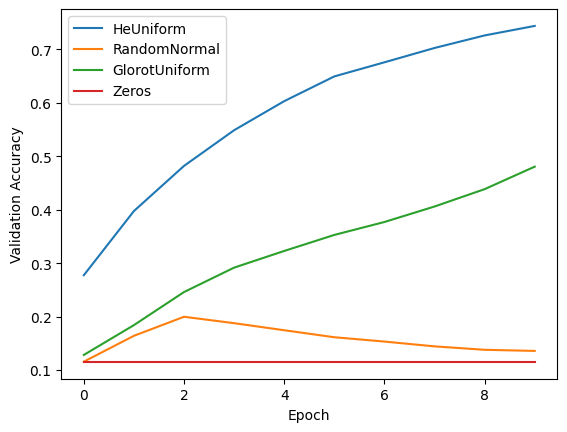

In [ ]:
for i in [model_heu, model_normal, model_glorotu, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

In [ ]:
def simple_model_bn(initializer = 'he_uniform', activation='relu'):
    return tf.keras.Sequential([layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(32, activation, kernel_initializer=initializer),
                                layers.BatchNormalization(trainable=True, scale=True, center=True),
                                layers.Dense(10, activation = 'softmax', kernel_initializer=tf.keras.initializers.glorot_normal())



    ])

In [ ]:
simple_model_bn().summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 32)                25120     
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dense_56 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_57 (Dense)            (None, 32)                1056      
                                                                 
 batch_normalization_2 (Bat  (None, 32)              

In [ ]:
init = tf.keras.initializers.he_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.SGD(0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 4s 77ms/step - loss: 2.5622 - accuracy: 0.1881 - val_loss: 2.3451 - val_accuracy: 0.1562
Epoch 2/10
19/19 [==============================] - 1s 51ms/step - loss: 1.9902 - accuracy: 0.3564 - val_loss: 2.1687 - val_accuracy: 0.2307
Epoch 3/10
19/19 [==============================] - 1s 44ms/step - loss: 1.6976 - accuracy: 0.4601 - val_loss: 1.9892 - val_accuracy: 0.3275
Epoch 4/10
19/19 [==============================] - 1s 42ms/step - loss: 1.5030 - accuracy: 0.5380 - val_loss: 1.8073 - val_accuracy: 0.4336
Epoch 5/10
19/19 [==============================] - 1s 57ms/step - loss: 1.3569 - accuracy: 0.5975 - val_loss: 1.6319 - val_accuracy: 0.5396
Epoch 6/10
19/19 [==============================] - 1s 31ms/step - loss: 1.2439 - accuracy: 0.6408 - val_loss: 1.4712 - val_accuracy: 0.6062
Epoch 7/10
19/19 [==============================] - 1s 30ms/step - loss: 1.1531 - accuracy: 0.6733 - val_loss: 1.3324 - val_accuracy: 0.6532
Epoch 8/10
19

In [ ]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adagrad(learning_rate = 0.01)
model_bn = simple_model_bn(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Epoch 1/10
19/19 [==============================] - 2s 43ms/step - loss: 1.0779 - accuracy: 0.6728 - val_loss: 2.2973 - val_accuracy: 0.1450
Epoch 2/10
19/19 [==============================] - 1s 35ms/step - loss: 0.4897 - accuracy: 0.8657 - val_loss: 2.2923 - val_accuracy: 0.2994
Epoch 3/10
19/19 [==============================] - 1s 39ms/step - loss: 0.3713 - accuracy: 0.8996 - val_loss: 2.2862 - val_accuracy: 0.1993
Epoch 4/10
19/19 [==============================] - 1s 39ms/step - loss: 0.3111 - accuracy: 0.9166 - val_loss: 2.2780 - val_accuracy: 0.1260
Epoch 5/10
19/19 [==============================] - 1s 40ms/step - loss: 0.2723 - accuracy: 0.9264 - val_loss: 2.2669 - val_accuracy: 0.1102
Epoch 6/10
19/19 [==============================] - 1s 29ms/step - loss: 0.2441 - accuracy: 0.9338 - val_loss: 2.2518 - val_accuracy: 0.1114
Epoch 7/10
19/19 [==============================] - 1s 27ms/step - loss: 0.2219 - accuracy: 0.9404 - val_loss: 2.2311 - val_accuracy: 0.1238
Epoch 8/10
19

In [ ]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)
model_bn_ad = simple_model_bn(init, activate)
model_bn_ad.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ad.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

Epoch 1/10
19/19 [==============================] - 4s 73ms/step - loss: 1.1387 - accuracy: 0.6486 - val_loss: 2.2974 - val_accuracy: 0.1018
Epoch 2/10
19/19 [==============================] - 1s 27ms/step - loss: 0.4902 - accuracy: 0.8655 - val_loss: 2.2916 - val_accuracy: 0.1031
Epoch 3/10
19/19 [==============================] - 1s 28ms/step - loss: 0.3601 - accuracy: 0.9015 - val_loss: 2.2848 - val_accuracy: 0.1146
Epoch 4/10
19/19 [==============================] - 0s 25ms/step - loss: 0.3004 - accuracy: 0.9189 - val_loss: 2.2764 - val_accuracy: 0.1344
Epoch 5/10
19/19 [==============================] - 1s 27ms/step - loss: 0.2626 - accuracy: 0.9300 - val_loss: 2.2642 - val_accuracy: 0.1678
Epoch 6/10
19/19 [==============================] - 1s 28ms/step - loss: 0.2361 - accuracy: 0.9372 - val_loss: 2.2494 - val_accuracy: 0.1806
Epoch 7/10
19/19 [==============================] - 1s 44ms/step - loss: 0.2149 - accuracy: 0.9441 - val_loss: 2.2289 - val_accuracy: 0.2136
Epoch 8/10
19

In [ ]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

Epoch 1/10
19/19 [==============================] - 5s 64ms/step - loss: 0.8479 - accuracy: 0.7418 - val_loss: 2.0891 - val_accuracy: 0.2794
Epoch 2/10
19/19 [==============================] - 0s 26ms/step - loss: 0.2621 - accuracy: 0.9223 - val_loss: 1.9018 - val_accuracy: 0.3467
Epoch 3/10
19/19 [==============================] - 1s 28ms/step - loss: 0.1760 - accuracy: 0.9496 - val_loss: 1.7441 - val_accuracy: 0.5064
Epoch 4/10
19/19 [==============================] - 1s 28ms/step - loss: 0.1302 - accuracy: 0.9624 - val_loss: 1.5697 - val_accuracy: 0.5891
Epoch 5/10
19/19 [==============================] - 1s 27ms/step - loss: 0.1004 - accuracy: 0.9707 - val_loss: 1.3999 - val_accuracy: 0.6530
Epoch 6/10
19/19 [==============================] - 0s 26ms/step - loss: 0.0811 - accuracy: 0.9767 - val_loss: 1.1602 - val_accuracy: 0.7690
Epoch 7/10
19/19 [==============================] - 1s 28ms/step - loss: 0.0670 - accuracy: 0.9808 - val_loss: 0.9214 - val_accuracy: 0.8796
Epoch 8/10
19

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data = (X_test, y_test))

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Epoch 1/10
19/19 [==============================] - 4s 42ms/step - loss: 0.8097 - accuracy: 0.7527 - val_loss: 2.1288 - val_accuracy: 0.2938
Epoch 2/10
19/19 [==============================] - 1s 30ms/step - loss: 0.2556 - accuracy: 0.9243 - val_loss: 1.9333 - val_accuracy: 0.3815
Epoch 3/10
19/19 [==============================] - 0s 26ms/step - loss: 0.1745 - accuracy: 0.9478 - val_loss: 1.7630 - val_accuracy: 0.4609
Epoch 4/10
19/19 [==============================] - 1s 28ms/step - loss: 0.1304 - accuracy: 0.9614 - val_loss: 1.6122 - val_accuracy: 0.5416
Epoch 5/10
19/19 [==============================] - 1s 28ms/step - loss: 0.1039 - accuracy: 0.9689 - val_loss: 1.4226 - val_accuracy: 0.6765
Epoch 6/10
19/19 [==============================] - 0s 26ms/step - loss: 0.0844 - accuracy: 0.9756 - val_loss: 1.2491 - val_accuracy: 0.7585
Epoch 7/10
19/19 [==============================] - 1s 42ms/step - loss: 0.0686 - accuracy: 0.9790 - val_loss: 0.9618 - val_accuracy: 0.8572
Epoch 8/10
19

In [ ]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Restoring model weights from the end of the best epoch: 8.
Epoch 18: early stopping
Train Acc: 0.9842833280563354 Test Acc: 0.9599999785423279


In [ ]:
init = tf.keras.initializers.random_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data = (X_test, y_test), verbose=0)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_test, y_test, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Restoring model weights from the end of the best epoch: 6.
Epoch 16: early stopping
Train Acc: 0.9833333492279053 Test Acc: 0.9634000062942505
